Iris dataset description can be found in
http://archive.ics.uci.edu/ml/datasets/iris 


Iris data can be downloaded from 
http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data



In [0]:
import pandas as pd
import numpy as np

In [51]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
new_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris_class']
dataset = pd.read_csv(url, names = new_names, skiprows =0, delimiter =',')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   iris_class    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [52]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
y = dataset['iris_class']
x = dataset.drop(['iris_class'], axis=1)

print ("dataset : ",dataset.shape)
print ("x : ",x.shape)
print ("y : ",y.shape)

dataset :  (150, 5)
x :  (150, 4)
y :  (150,)


In [54]:
#one hot encoding
y=pd.get_dummies(y)
y.sample(7)

,Iris-setosa,Iris-versicolor,Iris-virginica
69,0,1,0
108,0,0,1
91,0,1,0
23,1,0,0
56,0,1,0
122,0,0,1
139,0,0,1


In [55]:
#Selective import Scikit Learn 
from sklearn.model_selection import train_test_split

# Generate Training and Validation Sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) #0.3 data as data test

#converting to float 32bit
x_train = np.array(x_train).astype(np.float32)
x_test  = np.array(x_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)

#print data split for validation
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(105, 4) (105, 3)
(45, 4) (45, 3)


In [56]:

#Importing our model
from sklearn.neural_network import MLPClassifier

#model initialization
Model = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=2000, alpha=0.01, #try change hidden layer
                     solver='sgd', verbose=1,  random_state=121) #try verbode=0 to train with out logging
#train our model
h=Model.fit(x_train,y_train)
#use our model to predict
y_pred=Model.predict(x_test)

Iteration 1, loss = 2.42196876
Iteration 2, loss = 2.39359469
Iteration 3, loss = 2.35627147
Iteration 4, loss = 2.31295351
Iteration 5, loss = 2.26651726
Iteration 6, loss = 2.21926964
Iteration 7, loss = 2.17330142
Iteration 8, loss = 2.12997064
Iteration 9, loss = 2.08947614
Iteration 10, loss = 2.05275780
Iteration 11, loss = 2.02032962
Iteration 12, loss = 1.99204558
Iteration 13, loss = 1.96791169
Iteration 14, loss = 1.94799308
Iteration 15, loss = 1.93153219
Iteration 16, loss = 1.91828138
Iteration 17, loss = 1.90772587
Iteration 18, loss = 1.89989587
Iteration 19, loss = 1.89407835
Iteration 20, loss = 1.88940421
Iteration 21, loss = 1.88541710
Iteration 22, loss = 1.88186445
Iteration 23, loss = 1.87844026
Iteration 24, loss = 1.87505504
Iteration 25, loss = 1.87155894
Iteration 26, loss = 1.86787789
Iteration 27, loss = 1.86401618
Iteration 28, loss = 1.86002459
Iteration 29, loss = 1.85594100
Iteration 30, loss = 1.85176673
Iteration 31, loss = 1.84752124
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [57]:
#scikit for machine learning reporting
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_pred)) # Print summary report
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))) # Print Confusion matrix 
print('accuracy is ',accuracy_score(y_pred,y_test)) # Print accuracy score

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.91      0.95        11
           2       0.95      1.00      0.98        20

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45
 samples avg       0.98      0.98      0.98        45

[[14  0  0]
 [ 0 10  1]
 [ 0  0 20]]
accuracy is  0.9777777777777777


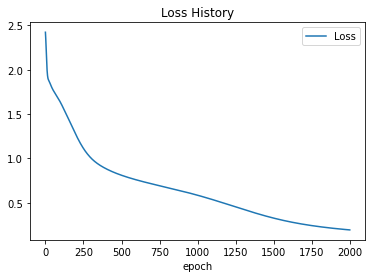

In [58]:
import matplotlib.pyplot as plt

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])